## Optimisation de la droite tangente

In [108]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Définition des points

Dans l'absence de données réel, données aléatoirement générées

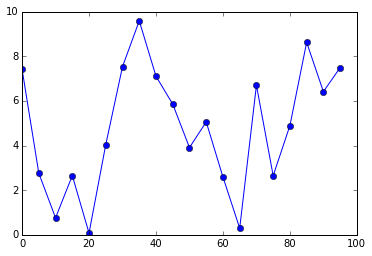

In [228]:
N = 20 #Nombre de points
L = 100 #Intervalle de variation de X
X = [i*L/N for i in range(0,N)] 
Y = np.random.uniform(0,10,N)
plt.plot(X,Y,"o-")

Définition de la fonction qui comparer deux courbes pour savoir si elles se coupent

In [229]:
def dontcut(X,Y,Yd,debug=False):
    c = 0
    if (Yd[0]-Y[0])*(Yd[-1]-Y[-1])<0.0:
        c = 1
    for i in range(1,len(X)-2):
        if (Yd[i]-Y[i])*(Yd[i+1]-Y[i+1])<0.0 or (Yd[i-1]-Y[i-1])*(Yd[i+2]-Y[i+2])<0.0:
            c = 1
        if debug:
            print(Yd[i],Y[i],(Yd[i]-Y[i])*(Yd[i+1]-Y[i+1]),(Yd[i-1]-Y[i-1])*(Yd[i+1]-Y[i+1]))

    if c == 0:
        return True
    else:
        return False

Générer l'ensemble des lignes définies à partir de deux points quelconque de la courbe qui ne coupent pas la courbe

In [216]:
def lines(X,Y):
    candidates = []
    for i in range(0,len(X)):
        for j in range(0,len(X)):
            if i != j:
                d = (Y[i]-Y[j])/(X[i]-X[j])
                Yd = [d*(u-X[i])+Y[i] for u in X]
                if dontcut(X,Y,Yd):
                    candidates.append(Yd)
    return candidates

Fonction d'optimisation moindre carrée

In [224]:
def selectBest(X,Y,candidates):
    sort = []
    for l in candidates:
        s = sum(((Y[i]-l[i])**2 for i in range(0,len(l))))
        sort.append([s,l])
    return sorted(sort)[0][1]

Résultat final 

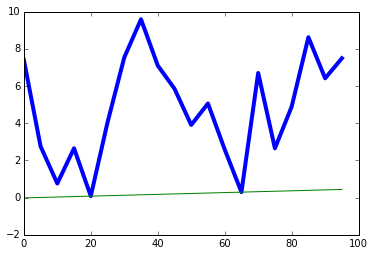

In [230]:
plt.plot(X,Y,linewidth=4)
L = lines(X,Y)
plt.plot(X,selectBest(X,Y,L))

In [231]:
np.polyfit(X,selectBest(X,Y,L),deg=1)

array([ 0.00478173, -0.01693393])

Autre solution avec la tangente

In [149]:
def add_line(X,Y,D):
    lines = []
    for i in range(0,len(D)):
        Yd = [D[i]*(j-X[i+1])+Y[i+1] for j in X]
        lines.append(Yd)
    return lines

def filterCross(Y,Yd):
    Lnc = []
    for L in Yd:
        c = 0
        for i in range(1,len(Y)-1):
            if (L[i]-Y[i])*(L[i+1]-Y[i+1])<0 or (L[i-1]-Y[i-1])*(L[i+1]-Y[i+1])<0:
                c = 1
        if c == 0:
            Lnc.append(L)
    
    if len(Lnc) == 0:
        print("Pas de droite tangente non séquente")
        return []
    else:
        sort = []
        for l in Lnc:
            s = sum(((Y[i]-l[i])**2 for i in range(0,len(l))))
            sort.append([s,l])
        print("Solution trouvée")
        return sorted(sort)[0][1]

D = []
for i in range(1,N-1):
    D.append((Y[i+1]-Y[i-1])/(X[i+1]-X[i-1]))